In [20]:
from langgraph.graph import StateGraph, START, END
from langchain_groq import ChatGroq
from typing import TypedDict 
from dotenv import load_dotenv

In [21]:
load_dotenv()
model= ChatGroq(model="llama-3.3-70b-versatile")

In [22]:
class Blogstate(TypedDict,total=False):
    title: str
    outline: str
    content: str

In [23]:
def create_outline(state: Blogstate)-> Blogstate:
    title= state['title']
    prompt= f"Create a detailed outline for a blog post with the title: {title}"
    outline=model.invoke(prompt).content
    state['outline']= outline
    return state

In [24]:
def create_blog(state:Blogstate)->Blogstate:
    title= state['title']
    outline= state['outline']
    prompt= f"Create a detailed blog post with the title: {title} and the following outline: {outline}"
    content=model.invoke(prompt).content
    state['content']=content
    return state

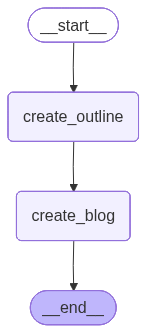

In [25]:
graph= StateGraph(Blogstate)

graph.add_node('create_outline',create_outline)
graph.add_node('create_blog', create_blog)

graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline','create_blog')
graph.add_edge('create_blog',END)

graph.compile()

In [26]:
workflow=graph.compile()

In [30]:
initial_state = {'title': ' Agentic AI: The Future of Autonomous Systems'}

final_state = workflow.invoke(initial_state)
print(final_state)

{'title': ' Agentic AI: The Future of Autonomous Systems', 'outline': 'Here is a detailed outline for a blog post on "Agentic AI: The Future of Autonomous Systems":\n\n**I. Introduction**\n\n* Brief overview of the current state of artificial intelligence (AI) and autonomous systems\n* Explanation of the concept of agentic AI and its potential to revolutionize the field\n* Thesis statement: Agentic AI is poised to become the future of autonomous systems, enabling more efficient, adaptable, and human-like decision-making in complex environments.\n\n**II. What is Agentic AI?**\n\n* Definition of agentic AI and its key characteristics (e.g., autonomy, agency, self-awareness)\n* Explanation of the differences between agentic AI and traditional AI approaches (e.g., rule-based systems, machine learning)\n* Discussion of the theoretical foundations of agentic AI, including cognitive architectures and agent-based modeling\n\n**III. Key Features of Agentic AI**\n\n* **Autonomy**: Ability of age

In [31]:
print(final_state['outline'])

Here is a detailed outline for a blog post on "Agentic AI: The Future of Autonomous Systems":

**I. Introduction**

* Brief overview of the current state of artificial intelligence (AI) and autonomous systems
* Explanation of the concept of agentic AI and its potential to revolutionize the field
* Thesis statement: Agentic AI is poised to become the future of autonomous systems, enabling more efficient, adaptable, and human-like decision-making in complex environments.

**II. What is Agentic AI?**

* Definition of agentic AI and its key characteristics (e.g., autonomy, agency, self-awareness)
* Explanation of the differences between agentic AI and traditional AI approaches (e.g., rule-based systems, machine learning)
* Discussion of the theoretical foundations of agentic AI, including cognitive architectures and agent-based modeling

**III. Key Features of Agentic AI**

* **Autonomy**: Ability of agentic AI systems to operate independently and make decisions without human intervention


In [32]:
print(final_state['content'])

**Agentic AI: The Future of Autonomous Systems**

The field of artificial intelligence (AI) has made tremendous progress in recent years, with significant advancements in machine learning, natural language processing, and computer vision. However, as AI systems become increasingly complex and autonomous, there is a growing need for a new paradigm that enables them to operate more efficiently, adaptably, and human-like in complex environments. This is where agentic AI comes in – a revolutionary concept that is poised to transform the future of autonomous systems. In this blog post, we will explore the concept of agentic AI, its key features, applications, benefits, and challenges, as well as its current state and future directions.

**What is Agentic AI?**

Agentic AI refers to a type of artificial intelligence that is characterized by autonomy, agency, self-awareness, and the ability to learn and adapt. Unlike traditional AI approaches, which rely on rule-based systems or machine learn